- 편집 모드/명령 모드 : Enter / ESC
- Run : 특수키 + Enter
- 셀 지우기 : ESC, x
- 셀 만들기 : ESC, b

머신러닝 - 교사학습 / 비교사학습 / 강화학습
- 교사학습 : X - Y 쌍, 성능측정이 가능하다. 데이터 양과 질에 비례해서 성능이 상승 
- 비교사학습 : X 만 존재. 성능측정이 애매하다. 데이터만 있으면 할 수 있다.
- 강화학습 : 환경(야구장과 상대편 선수들), 에이전트(나:타자), 행동(휘두르기),  보상(안타/아웃)

교사학습
- 선형회귀 : Y = WX + b, X,Y는 상수, W,b는 변수, Y:실수 ,MSE
- 논리회귀 : Y = sigmoid(WX + b), Y:정수(0, 1) , Y:(0,1,2,3,4,5...) > 원핫인코딩 > (1,0,0,0,0,0), MSE / CE 

오늘의 목표
- 멀티 클래스 분류
- 뉴럴 네트워크 : 입력 레이어, 출력레이어 + 히든 레이어를 추가
- CNN
- RNN

In [4]:
import numpy as np
x = [1,2,3]
y = [1.5, 2, 3] # 실수 : 예측용

In [5]:
#정확도와 결정계수
from sklearn.metrics import accuracy_score, r2_score

In [8]:
r2_score(y, x)

0.7857142857142857

In [121]:
x = [140, 160, 175] # 키
#y = [0, 1, 2] # 0:초, 1:중, 2:고 등학생
y = [[1,0,0],[0,1,0],[0,0,1] ]

In [122]:
x = np.array(x).reshape([-1, 1])
y = np.array(y).reshape([-1, 3])
x.shape, y.shape

((3, 1), (3, 3))

y = X W + b,  X (3,1) W(1,3) = (3,3)

In [100]:
def ce(h, Y):
    h = np.array(h)
    Y = np.array(Y)
    return - (Y*np.log(h) + (1-Y)*np.log(1-h) ) 

In [103]:
test_y = [1, 0, 0]
test_h = [0.9, 0.05, 0.05]
ce(test_h, test_y)

array([0.10536052, 0.05129329, 0.05129329])

In [36]:
import tensorflow as tf

In [208]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 3])
W = tf.Variable(tf.random_normal(shape=[1, 3]))
b = tf.Variable(tf.random_normal(shape=[3]))
z = tf.matmul(X, W) + b
h = tf.nn.softmax(z) # h 는 합이 1이 되는 확률, h=[0, 1]
h = tf.maximum(1e-8, h)
cost = - tf.reduce_mean(Y*tf.log(h) + (1-Y)*tf.log(1-h) )  # log(1) = 0, log(0) = -inf
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [241]:
for i in range(1000): # 에포크
    _, _cost = sess.run([train, cost], {X:x/100, Y:y})
_cost

0.27237937

In [246]:
_h = sess.run(h, {X:x/100})
_h

array([[0.80078936, 0.1810095 , 0.01820117],
       [0.20896098, 0.47306263, 0.31797633],
       [0.02025887, 0.25820872, 0.7215324 ]], dtype=float32)

In [249]:
np.argmax( _h, axis=1)

array([0, 1, 2], dtype=int64)

In [251]:
np.argmax(y, axis=1) 

array([0, 1, 2], dtype=int64)

In [252]:
accuracy_score(np.argmax(y, axis=1) , np.argmax( _h, axis=1)  )

1.0

In [65]:
sample = np.array([3, 1, 0.1])

In [53]:
def normalize(x):
    return x / np.sum(x)
def softmax(x):
    z = np.exp(x) # 2.7 ** x
    return z / np.sum(z)

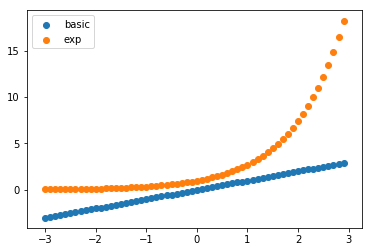

In [89]:
import matplotlib.pyplot as plt
arr = np.arange(-3, 3, 0.1)
plt.scatter(arr, arr, label='basic')
plt.scatter(arr, np.exp(arr),  label='exp')
plt.legend()

In [66]:
normalize(sample)

array([0.73170732, 0.24390244, 0.02439024])

In [67]:
softmax(sample)

array([0.84008305, 0.11369288, 0.04622407])